# The goal of this data science project is to build a predictive model and find out the sales of each product at a given Big Mart store.

## The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

## Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

## The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

#Importing Necessary Libraries
#Matplot and seaborn for making graphs
%matplotlib notebook
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
import featuretools as ft
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignor

In [2]:
 #Imorting the datasets
train =pd.read_csv("train_kOBLwZA.csv")
test=pd.read_csv("test_t02dQwI.csv")

print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [3]:
def concat(X,Y):
    df= pd.concat([X,Y],ignore_index=True)
    return df

In [4]:
df=concat(train,test)
print(df.shape)

(14204, 12)


In [5]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [7]:
df.isnull().sum()  
#Checks number of null values for all the variables
#Item_Weight has 2439 null values 
#Outlet Size has 4016 null values

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [8]:
df.apply(lambda x: len(x.unique()))
#Checks the number of unique entries correspnding to each variable

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
dtype: int64

In [9]:
#defining a function:
#frequency of unique entries in each columns with their names

def frequency_each_item(X,Y):
    for i in Y:
        print("frequency of each category for",i)
        print(X[i].value_counts())

In [9]:
#frequency of unique entries in each columns with their names
category=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']
frequency_each_item(df,category)

frequency of each category for Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
frequency of each category for Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
frequency of each category for Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
frequency of each category for Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
frequency of each category

In [10]:
mode_Outlet_Size=df.pivot_table(values='Outlet_Size', index='Outlet_Type',aggfunc=(lambda x: stats.mode(x)[0]))
print(mode_Outlet_Size)
bool2=df['Outlet_Size'].isnull()
df['Outlet_Size'][bool2]=df['Outlet_Type'][bool2].apply(lambda x : mode_Outlet_Size.loc[x]).values
sum(df['Outlet_Size'].isnull())

                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


0

In [11]:
# Correcting the mis-written datas
df['Item_Fat_Content'].replace(to_replace =['low fat','reg','LF'], 
                 value =['Low Fat','Regular','Low Fat'],inplace=True)
df['Item_Fat_Content'].value_counts()
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [12]:
avg_item_weight=df.pivot_table(values='Item_Weight', index='Item_Identifier',aggfunc=[np.mean])
print(avg_item_weight)
bool=df['Item_Weight'].isnull()
df['Item_Weight'][bool]=df['Item_Identifier'][bool].apply(lambda x :avg_item_weight.loc[x]).values
sum(df['Item_Weight'].isnull())

                       mean
                Item_Weight
Item_Identifier            
DRA12                11.600
DRA24                19.350
DRA59                 8.270
DRB01                 7.390
DRB13                 6.115
DRB24                 8.785
DRB25                12.300
DRB48                16.750
DRC01                 5.920
DRC12                17.850
DRC13                 8.260
DRC24                17.850
DRC25                 5.730
DRC27                13.800
DRC36                13.000
DRC49                 8.670
DRD01                12.100
DRD12                 6.960
DRD13                15.000
DRD15                10.600
DRD24                13.850
DRD25                 6.135
DRD27                18.750
DRD37                 9.800
DRD49                 9.895
DRD60                15.700
DRE01                10.100
DRE03                19.600
DRE12                 4.590
DRE13                 6.280
...                     ...
NCX05                15.200
NCX06               

0

In [13]:
#Reducing food category to only 3 types with the help of the first 2 alphabets of the Item_Identifier column

df['Item_Type_combined']=df['Item_Identifier'].apply(lambda x : x[0:2])
df['Item_Type_combined'].replace(to_replace =['FD','DR','NC'], 
                 value =['Food','Drinks','Non_consumable'],inplace=True)
 #dropping the redundant column
df=df.drop(columns=['Item_Type'])     
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_combined
0,Low Fat,FDA15,249.8092,3735.1380,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food
1,Regular,DRC01,48.2692,443.4228,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food
3,Regular,FDX07,182.0950,732.3800,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Food
4,Low Fat,NCD19,53.8614,994.7052,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Non_consumable


In [14]:
#Calculating number of Item_fat_contents that are also non_consumable

bool3=df['Item_Type_combined']=='Non_consumable'
df['Item_Fat_Content'][bool3]='Non_edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non_edible    2686
Name: Item_Fat_Content, dtype: int64

In [15]:
#Using feature Engineering and adding new column
df['yearsold']=2013-df['Outlet_Establishment_Year']
df=df.drop(columns=['Outlet_Establishment_Year'])
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_combined,yearsold
0,Low Fat,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
1,Regular,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
3,Regular,FDX07,182.0950,732.3800,0.000000,19.20,OUT010,Tier 3,Small,Grocery Store,Food,15
4,Non_edible,NCD19,53.8614,994.7052,0.000000,8.93,OUT013,Tier 3,High,Supermarket Type1,Non_consumable,26


In [16]:
# Converting all the zero values to mean in the visibility column
Item_Visibility_mean=df.pivot_table(index='Item_Identifier',values='Item_Visibility',aggfunc=[np.mean])
print(Item_Visibility_mean)
bool4=df['Item_Visibility']==0
df['Item_Visibility'][bool4]=df['Item_Identifier'][bool4].apply(lambda x:Item_Visibility_mean.loc[x] ).values
df.head()

                           mean
                Item_Visibility
Item_Identifier                
DRA12                  0.034938
DRA24                  0.045646
DRA59                  0.133384
DRB01                  0.079736
DRB13                  0.006799
DRB24                  0.020596
DRB25                  0.079407
DRB48                  0.023973
DRC01                  0.020653
DRC12                  0.037862
DRC13                  0.028408
DRC24                  0.026913
DRC25                  0.047354
DRC27                  0.066423
DRC36                  0.046932
DRC49                  0.070950
DRD01                  0.066330
DRD12                  0.074150
DRD13                  0.049125
DRD15                  0.064930
DRD24                  0.035205
DRD25                  0.082385
DRD27                  0.020545
DRD37                  0.013352
DRD49                  0.167987
DRD60                  0.040369
DRE01                  0.179808
DRE03                  0.026061
DRE12   

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_combined,yearsold
0,Low Fat,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
1,Regular,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
3,Regular,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,Tier 3,Small,Grocery Store,Food,15
4,Non_edible,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,Tier 3,High,Supermarket Type1,Non_consumable,26


In [17]:
#Checks for correation between different numerical columns
df.corr()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,yearsold
Item_MRP,1.000000,0.567574,-0.007550,0.035751,-0.000141
Item_Outlet_Sales,0.567574,1.000000,-0.128453,0.013261,0.049135
Item_Visibility,-0.007550,-0.128453,1.000000,-0.022028,0.084481
Item_Weight,0.035751,0.013261,-0.022028,1.000000,-0.000247
yearsold,-0.000141,0.049135,0.084481,-0.000247,1.000000


# Identifying outliers and fixing them

In [18]:
df.describe()            

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,yearsold
count,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.069710,12.793380,15.169319
std,62.086938,1706.499616,0.049728,4.651716,8.371664
min,31.290000,33.290000,0.003575,4.555000,4.000000
25%,94.012000,834.247400,0.031145,8.710000,9.000000
50%,142.247000,1794.331000,0.057194,12.600000,14.000000
75%,185.855600,3101.296400,0.096930,16.750000,26.000000
max,266.888400,13086.964800,0.328391,21.350000,28.000000


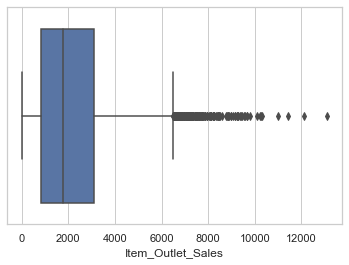

In [19]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Item_Outlet_Sales"])

In [20]:
#As we know only Item_Outlet_Sales have outliers we can fix them but fixing them will increase our RMSE score 
#to a large extent

# Plotting Graphs for more Analysis

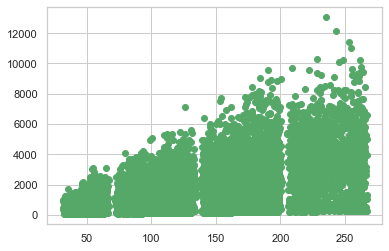

In [21]:
#value of sales increases for the increase in MRP of the item
plt.scatter(df.Item_MRP,df.Item_Outlet_Sales,c='g')
plt.show()


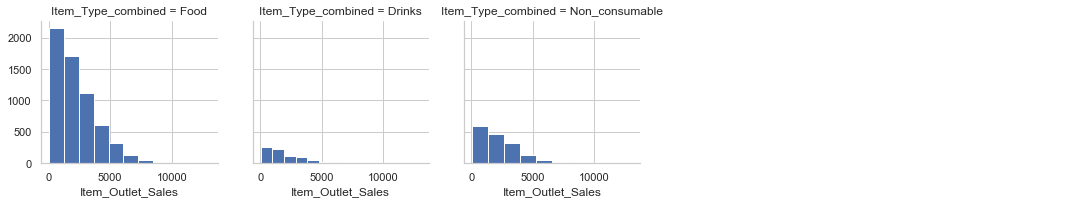

In [22]:
sns.FacetGrid(df, col='Item_Type_combined', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
# Maximum contribution to outlet sales is from Items that are food type and least is from drinks

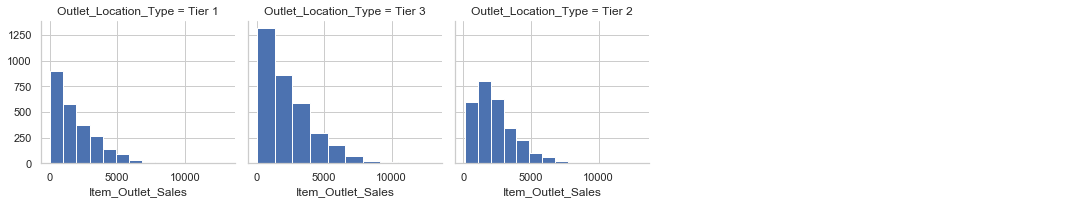

In [23]:
sns.FacetGrid(df, col='Outlet_Location_Type', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
#Tier3 type of outlet location provides for the maximum sales and other two provides the least sales

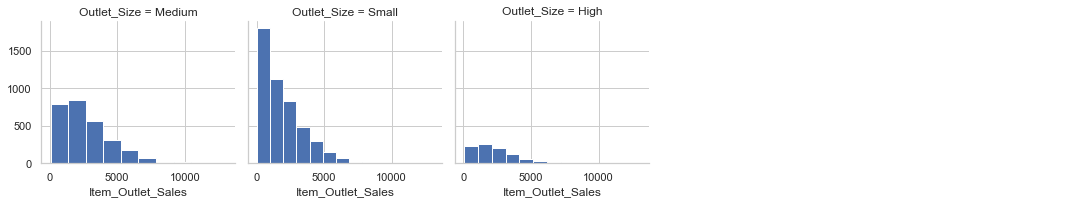

In [24]:
sns.FacetGrid(df, col='Outlet_Size', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
#Small sized Outlets are providing the maximum sales whereas large sized outlets 
# are contributing the least

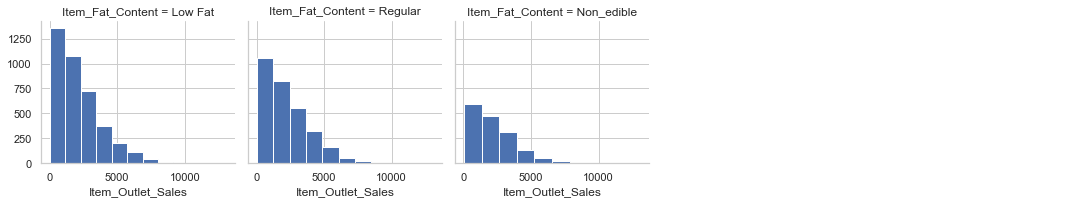

In [25]:
sns.FacetGrid(df, col='Item_Fat_Content', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
# people are prefering items with lowest fat content the most 

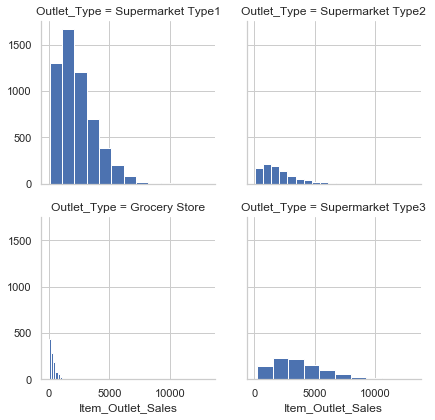

In [26]:
sns.FacetGrid(df, col='Outlet_Type', size=3, col_wrap=2) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
#Maximum of the high sales margin is from Supermarket Type1
#Grocery store has the least sales

In [27]:
#Label Encoding all the columns with text entries and dropping Item_identifier  
le=LabelEncoder()
list=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_combined',
      'Outlet_Size']
for i in list:
    le.fit(df[i])
    df[i]=le.transform(df[i])
df_new=df.drop(columns='Item_Identifier')
df_new= pd.get_dummies(df_new,columns=['Outlet_Identifier'])
df_new.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_combined,yearsold,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,249.8092,3735.1380,0.016047,9.30,0,1,1,1,14,0,0,0,0,0,0,0,0,0,1
1,2,48.2692,443.4228,0.019278,5.92,2,1,2,0,4,0,0,0,1,0,0,0,0,0,0
2,0,141.6180,2097.2700,0.016760,17.50,0,1,1,1,14,0,0,0,0,0,0,0,0,0,1
3,2,182.0950,732.3800,0.017834,19.20,2,2,0,1,15,1,0,0,0,0,0,0,0,0,0
4,1,53.8614,994.7052,0.009780,8.93,2,0,1,2,26,0,1,0,0,0,0,0,0,0,0


In [28]:
#Separating test and train set
df_new_train=df_new.iloc[:8523,:]
df_new_test=df_new.iloc[8523:,:]
df_new_test=df_new_test.drop(columns=['Item_Outlet_Sales'])

In [29]:
Y_train=df_new_train['Item_Outlet_Sales']
df_train_test=df_new_train.drop(columns=['Item_Outlet_Sales'])

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet 
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
import xgboost as xgb


In [31]:
models = [('lr',LinearRegression()),('ridge',Ridge()),('rfr',RandomForestRegressor()),('etr',ExtraTreesRegressor()),
         ('br',BaggingRegressor()),('gbr',GradientBoostingRegressor()),('en',ElasticNet()),('mlp',MLPRegressor())]

In [34]:
#Making function for making best 2 models for further hyperparameter tuning
def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i , j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds,n_jobs=5)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

In [35]:
basic_model_selection(df_train_test,Y_train,4,models)

lr 0.5600167514366813
ridge 0.5600211200777783
rfr 0.5259810264637599
etr 0.49389106307163183
br 0.5248672168702679
gbr 0.5924393177295112
en 0.47782907311746925
mlp 0.5661736156299884


In [36]:
#Average score for XGBoost matrix
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=df_train_test,label=Y_train)
# import XGBRegressor
xgb1 = XGBRegressor()
cv_score = cross_val_score(xgb1, df_train_test, Y_train, cv=4,n_jobs=5)
print(cv_score.mean())

0.5951594627612504


# Gradient Boost Regression and XGBoost Regression will be used for further hyperparameter tuning

In [37]:
def model_parameter_tuning(x,y,model,parameters,cross_folds):
    model_grid = GridSearchCV(model,
                        parameters,
                        cv = cross_folds,
                        n_jobs = 5,
                        verbose=True)
    model_grid.fit(x,y)
    y_predicted = model_grid.predict(x)
    print(model_grid.score)
    print(model_grid.best_params_)
    print("The RMSE score is",np.sqrt(np.mean((y-y_predicted)**2)))

#defining function for hyper parameter tuning and using RMSE as my metric
    

In [50]:
parameters_xgb = {'nthread':[3,4], 
              'learning_rate':[0.02,0.03], #so called `eta` value
              'max_depth': [3,2,4],
              'min_child_weight':[3,4,5],
              'silent': [1],
              'subsample': [0.5],
              'colsample_bytree': [0.7],
              'n_estimators': [300,320]
             }
parameters_gbr={'loss':['ls','lad'],
               'learning_rate':[0.3],
               'n_estimators':[300],
               'min_samples_split':[3,4],
               'max_depth':[3,4],
               'min_samples_leaf':[3,4,2],
               'max_features':['auto','log2','sqrt']
              }

# Defining the useful parameters for parameter tuning
# to get the optimum output

In [39]:
model_parameter_tuning(df_train_test,Y_train,xgb1,parameters_xgb,4)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   22.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 288 out of 288 | elapsed:  2.7min finished


<bound method BaseSearchCV.score of GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.02, 0.03], 'max_depth': [3, 2, 4],
                 

In [40]:
gbr=GradientBoostingRegressor()
model_parameter_tuning(df_train_test,Y_train,gbr,parameters_gbr,4)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   17.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  4.9min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  7.7min
[Parallel(n_jobs=5)]: Done 1296 out of 1296 | elapsed:  8.1min finished


<bound method BaseSearchCV.score of GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_i

In [41]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()
parameters_mlp = {'hidden_layer_sizes':[300,400,500],
              'activation':['relu','tanh'],
              'learning_rate':['adaptive'],
              'learning_rate_init':[0.001,0.004],
              'solver':['adam'],
              'max_iter':[200,300]
             }

In [42]:
model_parameter_tuning(df_train_test,Y_train,mlp,parameters_mlp,4)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  3.1min
[Parallel(n_jobs=5)]: Done  96 out of  96 | elapsed:  8.6min finished


<bound method BaseSearchCV.score of GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_stat...
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=5,
             param_grid={'activation': ['relu', 'tanh'],
      

# Standardization of the model before training

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized=scaler.fit_transform(df_train_test)
column_names = df_train_test.columns
df_standardized = pd.DataFrame(data=standardized,columns=column_names)
df_standardized.head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_combined,yearsold,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,-0.997813,1.747454,-1.081039,-0.769246,-1.369334,-0.664080,-0.252658,-0.179795,-0.139541,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
1,1.236942,-1.489023,-1.016230,-1.496813,1.091569,-0.664080,1.002972,-2.095286,-1.334103,-0.263920,-0.350395,-0.349128,2.860816,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
2,-0.997813,0.010040,-1.066741,0.995858,-1.369334,-0.664080,-0.252658,-0.179795,-0.139541,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
3,1.236942,0.660050,-1.045193,1.361794,1.091569,0.799954,-1.508289,-0.179795,-0.020085,3.789031,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
4,0.119565,-1.399220,-1.206757,-0.848890,1.091569,-2.128115,-0.252658,1.735696,1.293934,-0.263920,2.853918,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973


In [44]:
basic_model_selection(df_standardized,Y_train,4,models)

lr 0.5599682122990035
ridge 0.5600174793091026
rfr 0.5165207793760711
etr 0.4956682768018107
br 0.5171096007508749
gbr 0.5925857985119254
en 0.5116677567108185
mlp 0.5952554309685527


In [45]:
#Average score for XGBoost matrix
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=df_standardized,label=Y_train)
# import XGBRegressor
xgb1 = XGBRegressor()
cv_score = cross_val_score(xgb1, df_standardized, Y_train, cv=4,n_jobs=5)
print(cv_score.mean())

0.5951547716500721


# The Models for hyperparameter tuning are same XGBoost and GradientBoostingRegression

In [46]:
model_parameter_tuning(df_standardized,Y_train,xgb1,parameters_xgb,4)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   27.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done 288 out of 288 | elapsed:  3.1min finished


<bound method BaseSearchCV.score of GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.02, 0.03], 'max_depth': [3, 2, 4],
                 

In [47]:
model_parameter_tuning(df_standardized,Y_train,gbr,parameters_gbr,4)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   15.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   56.4s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  5.2min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  8.3min
[Parallel(n_jobs=5)]: Done 1296 out of 1296 | elapsed:  8.7min finished


<bound method BaseSearchCV.score of GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_i

In [49]:
df_train_test.head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_combined,yearsold,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,249.8092,0.016047,9.30,0,1,1,1,14,0,0,0,0,0,0,0,0,0,1
1,2,48.2692,0.019278,5.92,2,1,2,0,4,0,0,0,1,0,0,0,0,0,0
2,0,141.6180,0.016760,17.50,0,1,1,1,14,0,0,0,0,0,0,0,0,0,1
3,2,182.0950,0.017834,19.20,2,2,0,1,15,1,0,0,0,0,0,0,0,0,0
4,1,53.8614,0.009780,8.93,2,0,1,2,26,0,1,0,0,0,0,0,0,0,0


# Using Robust Scaler

# My dataset having outliers make it more prone to mistakes
# Robust Scaler handles the outliers as well
# It scales according to the quartile range

In [51]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
robust = RobustScaler(quantile_range = (0.1,0.8)) #range of inerquartile is one of the parameters
robust_stan = robust.fit_transform(df_train_test)
robust_stan_normalize = normalize.fit_transform(robust_stan)
# also normalized the dataset using MinMaxScaler i.e has bought the data set between (0,1)
df_robust_normalize = pd.DataFrame(robust_stan_normalize,columns=column_names)
df_robust_normalize.head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_combined,yearsold,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.0,0.927507,0.038399,0.282525,0.0,0.5,0.333333,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.072068,0.048346,0.081274,1.0,0.5,0.666667,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.468288,0.040593,0.770765,0.0,0.5,0.333333,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.640093,0.043901,0.871986,1.0,1.0,0.000000,0.5,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.095805,0.019104,0.260494,1.0,0.0,0.333333,1.0,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
basic_model_selection(df_robust_normalize,Y_train,4,models)

lr 0.5599279983880873
ridge 0.5600244473901529
rfr 0.5165027968093021
etr 0.4962660499002653
br 0.5162076976506412
gbr 0.5925765424070908
en 0.16451782722500888
mlp 0.494242396352599


In [53]:
cv_score = cross_val_score(xgb1, df_robust_normalize, Y_train, cv=4,n_jobs=5)
print(cv_score.mean())

0.5951547716500721


In [54]:
model_parameter_tuning(df_robust_normalize,Y_train,xgb1,parameters_xgb,4)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   22.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 288 out of 288 | elapsed:  2.7min finished


<bound method BaseSearchCV.score of GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.02, 0.03], 'max_depth': [3, 2, 4],
                 

In [55]:
model_parameter_tuning(df_robust_normalize,Y_train,gbr,parameters_gbr,4)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   11.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   51.9s
[Parallel(n_jobs=5)]: Done 288 out of 288 | elapsed:  1.4min finished


<bound method BaseSearchCV.score of GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_i

# Best Model 
# Comparing all models using RMSE score 


# Gradient Boosting Method is the best method when implemented using Robust Scaler and MinMaxScaler normalization
 PARAMETERS AND RMSE RESPECTIVELY
 {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
The RMSE score is 1049.14085875651

In [56]:
robust_test = robust.fit_transform(df_new_test)
robust_normalize_test = normalize.fit_transform(robust_test)
df_test_robust_normalize = pd.DataFrame(robust_normalize_test,columns=column_names)

In [59]:
gbr = GradientBoostingRegressor(learning_rate= 0.3, loss= 'lad',max_depth= 3,min_samples_leaf=2,min_samples_split=3
                                ,n_estimators= 300)
# Defining my final model that I will use for prediction

In [60]:
gbr.fit(df_robust_normalize,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.3, loss='lad', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
final_prediction=gbr.predict(df_test_robust_normalize) #Predicting the outlet sales

In [65]:
#the prediction is in the form of numpy array 
# Converting into Dataframe 
df_final_prediction = pd.DataFrame(final_prediction,columns=['Item_Outlet_Sales'])

In [66]:
df_final_prediction.head()

,Item_Outlet_Sales
0,1621.189785
1,1285.430878
2,531.413666
3,2569.549126
4,5662.989576


# Saving the final model using Joblib

In [62]:
import joblib
filename = 'final_model.sav' # Name of the model 
joblib.dump(gbr, filename) # it is saved in your current working directory

['final_model.sav']

In [67]:
# This command loads the model once again
load_model = joblib.load(filename)